In [1]:
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols
import sympy
from sympy.tensor.tensor import TensorIndexType, TensorHead, tensor_indices

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi = sympy.symbols("t r theta phi")

In [3]:
dt, dr, dtheta, dphi = sympy.symbols(r"dt dr d\theta d\phi")

In [4]:
a, delta, m = sympy.symbols("a delta m")

In [5]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

In [6]:
dr_tilde = sympy.symbols("d\\tilde{r}")

In [7]:
omega = sympy.symbols("Omega")

In [8]:
r_tilde_plus = sympy.symbols("\\tilde{r}_+")

### Metric

In [9]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig += W * (dr_tilde ** 2 / delta_r + dtheta ** 2 / delta_theta)

In [10]:
metric_orig

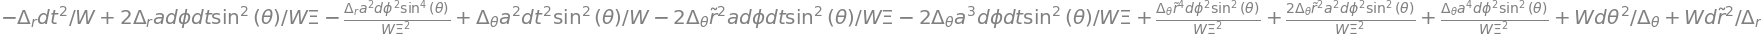

In [11]:
metric = metric_orig.expand()
metric

In [12]:
metric_list_matrix = [[0 for i in range(4)] for i in range(4)]

# dt
metric_list_matrix[0][0] = metric.coeff(dt ** 2)
metric_list_matrix[0][1] = metric.coeff(dt * dr_tilde) / 2
metric_list_matrix[0][2] = metric.coeff(dt * dtheta) / 2
metric_list_matrix[0][3] = metric.coeff(dt * dphi) / 2

# dr_tilde
metric_list_matrix[1][0] = metric.coeff(dr_tilde * dt) / 2
metric_list_matrix[1][1] = metric.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = metric.coeff(dr_tilde * dtheta) / 2
metric_list_matrix[1][3] = metric.coeff(dr_tilde * dphi) / 2

# dtheta
metric_list_matrix[2][0] = metric.coeff(dtheta * dt) / 2
metric_list_matrix[2][1] = metric.coeff(dtheta * dr_tilde) / 2
metric_list_matrix[2][2] = metric.coeff(dtheta ** 2)
metric_list_matrix[2][3] = metric.coeff(dtheta * dphi) / 2

# dphi
metric_list_matrix[3][0] = metric.coeff(dphi * dt) / 2
metric_list_matrix[3][1] = metric.coeff(dphi * dr_tilde) / 2
metric_list_matrix[3][2] = metric.coeff(dphi * dtheta) / 2
metric_list_matrix[3][3] = metric.coeff(dphi ** 2)

In [13]:
syms = sympy.symbols("t \\tilde{r} theta phi")
sch = MetricTensor(metric_list_matrix, syms)
sch.tensor().simplify()

⎡                         2    2                                              
⎢           -Δᵣ + Δₜₕₑₜₐ⋅a ⋅sin (θ)                                           
⎢           ───────────────────────              0     0                      
⎢                      W                                                      
⎢                                                                             
⎢                                                W                            
⎢                      0                         ──    0                      
⎢                                                Δᵣ                           
⎢                                                                             
⎢                                                      W                      
⎢                      0                         0   ──────                   
⎢                                                    Δₜₕₑₜₐ                   
⎢                                                   

In [14]:
ch = ChristoffelSymbols.from_metric(sch)
ch = ch.tensor()
ch

⎡⎡                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                  

In [15]:
Lorentzian = TensorIndexType('Lorentzian', dummy_name='L')
i0, i1, i2, i3 = tensor_indices('i0:4', Lorentzian)

In [16]:
K = [1, 0, 0, omega]
K

In [17]:
gKK_tensor = TensorHead('gKK', [Lorentzian] * 4)
repl = {gKK_tensor(-i0, -i1, i2, i3): sympy.tensorproduct(sympy.tensorproduct(sch.tensor(), K), K)}

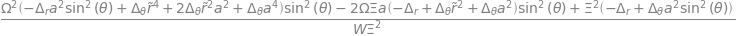

In [18]:
K_squared = gKK_tensor(-i0, -i1, i1, i0).replace_with_arrays(repl)
K_squared = sympy.simplify(K_squared)
K_squared

In [19]:
K_squared_num = sympy.fraction(K_squared)[0]
K_squared_num

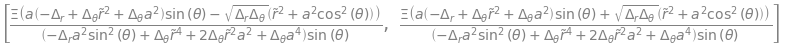

In [20]:
sols = sympy.solve(K_squared_num, omega)
sols

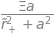

In [21]:
omega_val = a * xi / (r_tilde_plus ** 2 + a ** 2)
omega_val

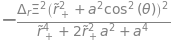

In [22]:
x = K_squared_num.subs({r_tilde: r_tilde_plus, omega: omega_val}).simplify().expand().simplify()
x

In [23]:
sympy.fraction(x)[0].simplify().trigsimp().factor().simplify()

Because $\Delta_r = 0$ when $\tilde{r}=\tilde{r}_+$, the Killing vector field is indeed a Killing horizon.

#### Non-rotating Frame at Infinity

Make a change of coordinates.

In [24]:
phi_prime = phi + a * t
phi_prime

In [25]:
dphi_prime = sympy.symbols("d\phi'")
dphi_val = dphi_prime - a * dt
dphi_val

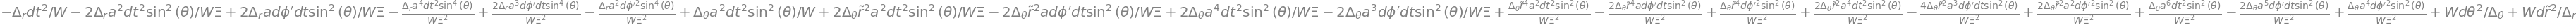

In [26]:
metric_phi_prime = metric.subs({dphi: dphi_val}).expand()
metric_phi_prime

In [27]:
metric_list_matrix = [[0 for i in range(4)] for i in range(4)]

# dt
metric_list_matrix[0][0] = metric_phi_prime.coeff(dt ** 2)
metric_list_matrix[0][1] = metric_phi_prime.coeff(dt * dr_tilde) / 2
metric_list_matrix[0][2] = metric_phi_prime.coeff(dt * dtheta) / 2
metric_list_matrix[0][3] = metric_phi_prime.coeff(dt * dphi_prime) / 2

# dr_tilde
metric_list_matrix[1][0] = metric_phi_prime.coeff(dr_tilde * dt) / 2
metric_list_matrix[1][1] = metric_phi_prime.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = metric_phi_prime.coeff(dr_tilde * dtheta) / 2
metric_list_matrix[1][3] = metric_phi_prime.coeff(dr_tilde * dphi_prime) / 2

# dtheta
metric_list_matrix[2][0] = metric_phi_prime.coeff(dtheta * dt) / 2
metric_list_matrix[2][1] = metric_phi_prime.coeff(dtheta * dr_tilde) / 2
metric_list_matrix[2][2] = metric_phi_prime.coeff(dtheta ** 2)
metric_list_matrix[2][3] = metric_phi_prime.coeff(dtheta * dphi_prime) / 2

# dphi_prime
metric_list_matrix[3][0] = metric_phi_prime.coeff(dphi_prime * dt) / 2
metric_list_matrix[3][1] = metric_phi_prime.coeff(dphi_prime * dr_tilde) / 2
metric_list_matrix[3][2] = metric_phi_prime.coeff(dphi_prime * dtheta) / 2
metric_list_matrix[3][3] = metric_phi_prime.coeff(dphi_prime ** 2)

In [28]:
syms = sympy.symbols("t \\tilde{r} theta phi'")
sch = MetricTensor(metric_list_matrix, syms)
sch.tensor().simplify()

⎡ 2 ⎛              2    2   ⎞        2 ⎛                      2           2⎞  
⎢Ξ ⋅⎝-Δᵣ + Δₜₕₑₜₐ⋅a ⋅sin (θ)⎠ + 2⋅Ξ⋅a ⋅⎝-Δᵣ + Δₜₕₑₜₐ⋅\tilde{r}  + Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [29]:
K = [1, 0, 0, omega]
K

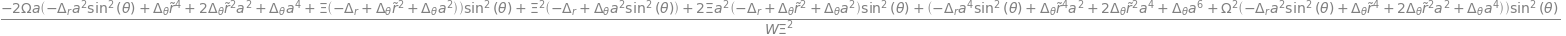

In [30]:
gKK_tensor = TensorHead('gKK', [Lorentzian] * 4)
repl = {gKK_tensor(-i0, -i1, i2, i3): sympy.tensorproduct(sympy.tensorproduct(sch.tensor(), K), K)}
K_squared = gKK_tensor(-i0, -i1, i1, i0).replace_with_arrays(repl).simplify()
K_squared

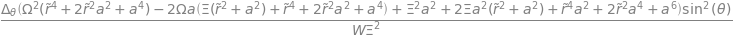

In [31]:
K_squared = K_squared.subs({delta_r: 0}).simplify()
K_squared

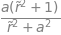

In [32]:
omega_val = a * (1 + r_tilde ** 2) / (r_tilde ** 2 + a ** 2)
omega_val

In [33]:
K_squared.subs({omega: omega_val}).simplify().subs({xi: 1 - a ** 2}).simplify()

Make another change of coordinates.

In [34]:
dphi_double_prime = sympy.symbols("d\phi''")
dphi_prime_val = dphi_double_prime + omega * dt
dphi_prime_val

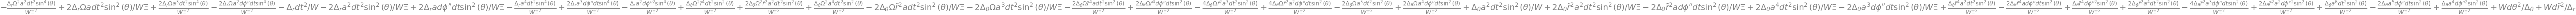

In [35]:
metric_phi_double_prime = metric_phi_prime.subs({dphi_prime: dphi_prime_val}).expand()
metric_phi_double_prime

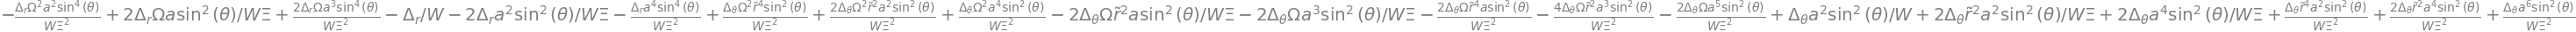

In [36]:
g_tt = metric_phi_double_prime.coeff(dt ** 2)
g_tt

In [37]:
g_tt_simp = -delta_r * (xi + a * (a - omega) * sympy.sin(theta) ** 2) ** 2 + delta_theta * sympy.sin(theta) ** 2 * (a * xi + (a - omega) * (r_tilde ** 2 + a ** 2)) ** 2
g_tt_simp

In [38]:
(g_tt_simp / (W * xi ** 2) - g_tt).subs({xi: 1 - a ** 2}).expand().simplify()

Verify in the BPS limit, $\Omega^* = 1$.

In [39]:
r_tilde_plus_val = 2 * m * sympy.sinh(delta) ** 2 / sympy.cosh(2 * delta)
r_tilde_plus_val += 2 * m * sympy.sinh(delta) ** 2
r_tilde_plus_val.simplify()

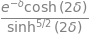

In [40]:
# m_val = sympy.cosh(2 * delta) / (sympy.exp(delta) * sympy.sinh(2 * delta) ** 4)
m_val = sympy.cosh(2 * delta) / (sympy.exp(delta) * sympy.sinh(2 * delta) ** 2 * sympy.sqrt(sympy.sinh(2 * delta)))
m_val

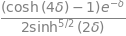

In [41]:
r_tilde_plus_val = r_tilde_plus_val.subs({m: m_val}).simplify()
r_tilde_plus_val

In [42]:
a_val = 2 / (sympy.exp(4 * delta) - 1)
a_val

In [43]:
sinh_2_delta_val = (sympy.exp(2 * delta) - sympy.exp(-2 * delta)) / 2
sinh_delta_val = (sympy.exp(delta) - sympy.exp(-delta)) / 2
cosh_4_delta_val = (sympy.exp(4 * delta) + sympy.exp(-4 * delta)) / 2

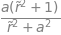

In [44]:
omega_val

In [45]:
omega_val_bps = omega_val.subs({r_tilde: r_tilde_plus_val, a: a_val}).simplify()
omega_val_bps = omega_val_bps.subs({sympy.cosh(4 * delta): cosh_4_delta_val, sympy.sinh(2 * delta): sinh_2_delta_val}).expand().simplify()
omega_val_bps

You indeed get 1. This is what you get before the change of coordinates:

In [46]:
omega_val_2 = a * xi / (r_tilde ** 2 + a ** 2)
omega_val_2

In [47]:
omega_val_bps_2 = omega_val_2.subs({r_tilde: r_tilde_plus_val, a: a_val}).simplify()
omega_val_bps_2 = omega_val_bps_2.subs({sympy.cosh(4 * delta): cosh_4_delta_val, sympy.sinh(2 * delta): sinh_2_delta_val}).expand().simplify()
omega_val_bps_2

Try to solve for $m$ directly.

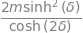

In [48]:
r_val = 2 * m * sympy.sinh(delta) ** 2 / sympy.cosh(2 * delta)
r_val

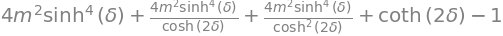

In [49]:
X = r ** 2 + 2 * m * sympy.sinh(delta) ** 2 * r + 4 * m ** 2 * sympy.sinh(delta) ** 4 + sympy.coth(2 * delta) - 1
X = X.subs({r: r_val}).simplify()
X

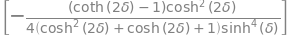

In [50]:
sols_m = sympy.solve(X, m ** 2)
sols_m

Try to compute angular velocity directly.

In [51]:
g_tt = sch[0, 0]
g_tphi = sch[0, 3]
g_phiphi = sch[3, 3]

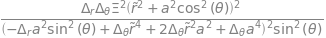

In [52]:
part1 = ((g_tphi / g_phiphi) ** 2 - g_tt / g_phiphi).simplify()
part1

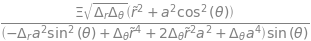

In [53]:
part1_sqrt = xi * sympy.sqrt(delta_r * delta_theta) * (r_tilde ** 2 + a ** 2 * sympy.cos(theta) ** 2)
part1_sqrt /= sympy.sin(theta) * (-delta_r * a ** 2 * sympy.sin(theta) ** 2 + delta_theta * r_tilde ** 4 + 2 * delta_theta * r_tilde ** 2 * a ** 2 + delta_theta * a ** 4)
part1_sqrt

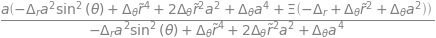

In [54]:
part2 = (-g_tphi / g_phiphi).simplify()
part2

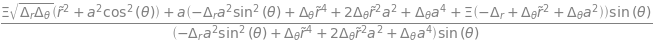

In [55]:
(part2 + part1_sqrt).simplify()

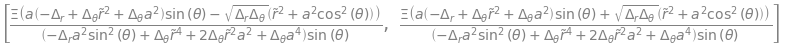

In [56]:
sols

In [57]:
sols[0].subs({delta_r: 0}).simplify()

These produce the same results.

#### Timelike Killing Vector in BPS Limit

In [58]:
timelike_condition = -g_tt_simp.subs({omega: 1})
timelike_condition

In [59]:
delta_r_val = r ** 2 + a ** 2 - 2 * m * r + r_tilde ** 2 * (r_tilde ** 2 + a ** 2)
delta_r_val

In [60]:
r_val = r_tilde - 2 * m * sympy.sinh(delta) ** 2
r_val

In [61]:
delta_r_val = delta_r_val.subs({r: r_val})
delta_r_val

In [62]:
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2
delta_theta_val

In [63]:
xi_val = 1 - a ** 2
xi_val

In [64]:
tc_expand = timelike_condition.subs({delta_r: delta_r_val}).expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
tc_expand

In [65]:
A_coeff = tc_expand.coeff(r_tilde ** 4).subs({xi: xi_val}).subs({delta_theta: delta_theta_val}).simplify()
A_coeff

In [66]:
tc_expand.coeff(r_tilde ** 3)

In [67]:
B_coeff = tc_expand.coeff(r_tilde ** 2).subs({xi: xi_val}).subs({delta_theta: delta_theta_val}).simplify().factor()
B_coeff.trigsimp()

This is the same as:

In [68]:
B_coeff = (a ** 2 * sympy.cos(theta) ** 4 + 1) * (a - 1) ** 2 * (a + 1) ** 2
B_coeff

In [69]:
C_coeff = tc_expand.coeff(r_tilde).subs({xi: xi_val}).simplify()
C_coeff

In [70]:
D_coeff = tc_expand - tc_expand.coeff(r_tilde ** 4) * r_tilde ** 4 - tc_expand.coeff(r_tilde ** 2) * r_tilde ** 2 - tc_expand.coeff(r_tilde) * r_tilde
D_coeff = D_coeff.subs({xi: xi_val}).simplify().subs({delta_theta: delta_theta_val}).expand().simplify()
D_coeff /= (a - 1) ** 2
D_coeff

In [71]:
D_coeff_m = (a - 1) ** 2 * D_coeff.coeff(m ** 2).simplify()
D_coeff_m

In [72]:
D_coeff_0 = (a - 1) ** 2 * (D_coeff - D_coeff.coeff(m ** 2) * m ** 2).simplify().factor()
D_coeff_0

In [73]:
tc_cond2 = A_coeff * r_tilde ** 4 + B_coeff * r_tilde ** 2 + C_coeff * r_tilde + D_coeff_m * m ** 2 + D_coeff_0
tc_cond2 /= (a - 1) ** 2
tc_cond2 = tc_cond2.simplify()
tc_cond2

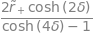

In [74]:
m_val_in_r_tilde_plus = 2 * sympy.cosh(2 * delta) * r_tilde_plus / (sympy.cosh(4 * delta) - 1)
m_val_in_r_tilde_plus

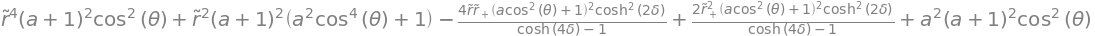

In [75]:
tc_cond2 = tc_cond2.subs({m: m_val_in_r_tilde_plus})
tc_cond2

In [76]:
sympy.solve(r_tilde_plus ** 2 + a ** 2 - a * (1 + r_tilde_plus ** 2), a)

#### $a=\tilde{r}_+^2$

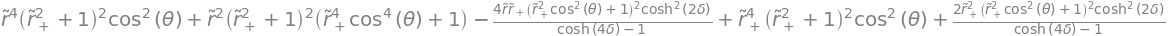

In [77]:
tc_cond_a_subs = tc_cond2.subs({a: r_tilde_plus ** 2})
tc_cond_a_subs

Simplify the $\delta$ terms.

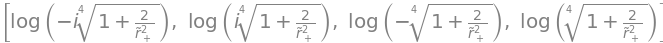

In [78]:
delta_vals = sympy.solve(a_val - r_tilde_plus ** 2, delta)
delta_vals

All roots produce the same result, so choose:

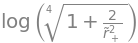

In [79]:
delta_val = delta_vals[3]
delta_val

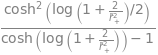

In [80]:
(sympy.cosh(2 * delta) ** 2 / (sympy.cosh(4 * delta) - 1)).subs({delta: delta_val}).simplify().trigsimp()

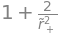

In [81]:
y = 1 + 2 / r_tilde_plus ** 2
y

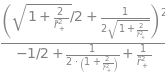

In [82]:
z = ((sympy.sqrt(y) + 1 / sympy.sqrt(y)) / 2) ** 2 / ((y + 1 / y) / 2 - 1)
z

In [83]:
z.simplify()

This is $\frac{1}{2}(\tilde{r}_+^2+1)^2$.

In [279]:
A_coeff_val = sympy.cos(theta) ** 2
B_coeff_val = (r_tilde_plus ** 4 * sympy.cos(theta) ** 4 + 1)
C_coeff_val = -2 * r_tilde_plus * (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) ** 2
D_coeff_val = r_tilde_plus ** 4 * sympy.cos(theta) ** 2 + r_tilde_plus ** 2 * (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) ** 2

In [280]:
tc_cond3 = A_coeff_val * r_tilde ** 4 + B_coeff_val * r_tilde ** 2 + C_coeff_val * r_tilde + D_coeff_val
tc_cond3

Completing the square, you get:

In [281]:
tc_cond3_complete_square = sympy.cos(theta) ** 2 * (r_tilde ** 2 - r_tilde_plus ** 2) ** 2 + (r_tilde_plus - r_tilde) ** 2 * (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) ** 2
tc_cond3_complete_square

In [284]:
(tc_cond3_complete_square - tc_cond3).simplify()

$\tilde{r}_+$ is a root.

In [ ]:
tc_cond3.subs({r_tilde: r_tilde_plus}).simplify()

In [ ]:
A, B, C, D = sympy.symbols("A B C D")
tc_cond_quartic = A * r_tilde ** 4 + B * r_tilde ** 2 + C * r_tilde + D
tc_cond_quartic

In [ ]:
sol = sympy.solve(tc_cond_quartic, r_tilde)

In [ ]:
import numpy as np

In [ ]:
roots = {}

r_tilde_plus_vals = range(1, 21)
theta_val = np.pi

for r_tilde_plus_val in r_tilde_plus_vals:
    root_vals = []
    for i in range(4):
        root = sol[i].subs({A: A_coeff_val, B: B_coeff_val, C: C_coeff_val, D: D_coeff_val}).subs({r_tilde_plus: r_tilde_plus_val, theta: theta_val})
        root_vals.append(root.evalf())
    roots[r_tilde_plus_val] = root_vals

In [ ]:
roots

In [ ]:
[r[1].coeff(sympy.I) * np.cos(np.pi) for r in roots.values()]

In [ ]:
[(r ** 2 * np.cos(np.pi) ** 2 + 1) for r in r_tilde_plus_vals]

In [ ]:
root_1 = -r_tilde_plus - (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) * sympy.sec(theta) * sympy.I
root_2 = -r_tilde_plus + (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) * sympy.sec(theta) * sympy.I
root_3 = r_tilde_plus
root_1, root_2, root_3

In [ ]:
tc_cond3.subs({r_tilde: root_1}).expand().simplify()

In [ ]:
tc_cond3.subs({r_tilde: root_2}).expand().simplify()

In [ ]:
tc_cond3.subs({r_tilde: root_3}).expand().simplify()

In [ ]:
r_tilde_vals = range(0, 21)
r_tilde_plus_val = 5
theta_val = np.pi / 4

tc_cond_vals = []

for r_tilde_val in r_tilde_vals:
    tc_cond_vals.append(tc_cond3.subs({r_tilde_plus: r_tilde_plus_val, r_tilde: r_tilde_val, theta: theta_val}))

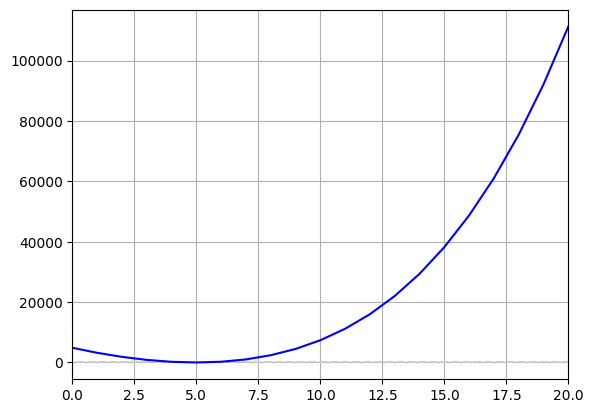

In [ ]:
import matplotlib.pyplot as plt

plt.plot([r_tilde_vals[0] - 5, r_tilde_vals[-1] + 5], [0, 0], '--', c='0.8')
plt.plot(r_tilde_vals, tc_cond_vals, 'b-')
plt.xlim([r_tilde_vals[0], r_tilde_vals[-1]])
plt.grid()

#### $a=1$

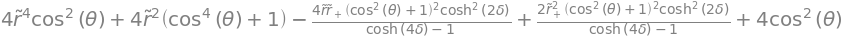

In [ ]:
tc_cond_a_subs_2 = tc_cond2.subs({a: 1})
tc_cond_a_subs_2

In [ ]:
delta_vals = sympy.solve(a_val - 1, delta)
delta_vals

In [ ]:
delta_val = delta_vals[3]
delta_val

In [ ]:
(sympy.cosh(2 * delta) ** 2 / (sympy.cosh(4 * delta) - 1)).subs({delta: delta_val}).simplify().trigsimp()

In [ ]:
A_coeff_val = 4 * sympy.cos(theta) ** 2
B_coeff_val = 4 * (sympy.cos(theta) ** 4 + 1)
C_coeff_val = -8 * r_tilde_plus * (sympy.cos(theta) ** 2 + 1) ** 2
D_coeff_val = 4 * sympy.cos(theta) ** 2 + 4 * r_tilde_plus ** 2 * (sympy.cos(theta) ** 2 + 1) ** 2

In [ ]:
tc_cond4 = A_coeff_val * r_tilde ** 4 + B_coeff_val * r_tilde ** 2 + C_coeff_val * r_tilde + D_coeff_val
tc_cond4

In [ ]:
tc_cond4.subs({r_tilde: r_tilde_plus}).simplify()

$\tilde{r}_+$ is not a root, however, the scenario $a=1$ is not allowed since $a^2 < 1$.